In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import pickle
import import_ipynb
import sys
sys.path.append('./../')
import Portfolio_value as pv

In [2]:
df =  pd.read_csv('./../data/data.csv')

In [3]:
def get_metric2(retire_year, k, upper_year, withrate, df, init_wealth, p_val, w_val, decile, period):
    # bequest
    p_amounts = p_val['year{}_k{}_decile{}_period{}_basic'.format(upper_year, k, decile, period)][retire_year]
    bequest = p_amounts[12*upper_year]*init_wealth*(1-withrate)/100
    
    # withdraw_amount
    w_amounts = w_val['year{}_k{}_decile{}_period{}_basic'.format(upper_year, k, decile, period)][retire_year]
    withdraw_amount = sum(w_amounts)
    
    # depletion time
    if np.argwhere(p_amounts == 0).size > 0 : # 고갈이 되면
        dep_time = np.argwhere(p_amounts == 0)[0][0]
    elif np.argwhere(p_amounts == 0).size == 0: # 고갈이 안되면
        dep_time = upper_year*12
        
    # max decline
    dec = np.min(p_amounts)/p_amounts[0]
    dec = dec - 1
    
    # underwater duration
    start_date = datetime(retire_year, 1, 1)
    end_date = start_date + relativedelta(years=upper_year)
    
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    
    under_count = 0
    for i in range(upper_year*12):
        if p_amounts[i]*df.iloc[i]['CPI'] < p_amounts[0]*df.iloc[0]['CPI'] :
             under_count+= 1
        
    return bequest/1000 , withdraw_amount/1000 , dep_time, dec * 100, under_count

In [4]:
init_wealth = np.array([1.63965472e+08, 2.70248416e+08, 3.82921690e+08, 5.36130637e+08, 1.06264929e+09]) / 1300
k = 0.5
withdraw_rate_normal = np.array([[0.12954898, 0.06854671, 0.04080897, 0.02465377, 0.01243838],
       [0.12230136, 0.06248429, 0.03527687, 0.01995857, 0.01006955],
       [0.11505374, 0.05642231, 0.02974509, 0.01526315, 0.0077006 ]])

withdraw_rate_minimum = np.array([[ 0.06975591,  0.03226898,  0.01520582,  0.00636718,  0.00321239],
       [ 0.06250828,  0.02620656,  0.00967373,  0.00167198,  0.00084355],
       [ 0.05526066,  0.02014458,  0.00414194, -0.00302344, -0.0015254 ]])


# Normal

In [5]:
p_val_normal = np.load('./../result/income_rate/p_val/p_val_const_normal_spending_basic.npy', allow_pickle=True)
w_val_normal = np.load('./../result/income_rate/w_val/w_val_const_normal_spending_basic.npy', allow_pickle=True)

p_val_normal = p_val_normal.reshape(1)
p_val_normal = p_val_normal[0]

w_val_normal = w_val_normal.reshape(1)
w_val_normal = w_val_normal[0]

In [6]:

# for upper_year in [15,20,25]:
#     for k in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
#         for withdraw_rate in [0.04,0.06,0.08,0.10]:
#             for year in range(1980,2003-upper_year):
             

In [7]:
normal_year = np.load('./../result/year/normal_year.npy', allow_pickle=True).reshape(1)[0]
bear_year = np.load('./../result/year/bear_year.npy', allow_pickle=True).reshape(1)[0]
full_year = np.load('./../result/year/full_year.npy', allow_pickle=True).reshape(1)[0]

In [8]:
upper_years = [20, 25, 30]

In [9]:
bear_perform_1_normal = {}
bear_perform_2_normal = {}
bear_perform_3_normal = {}
bear_perform_4_normal = {}
bear_perform_5_normal = {}
for upper_year in upper_years:
    bear_perform_1_normal[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_2_normal[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    
    bear_perform_3_normal[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_4_normal[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_5_normal[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}

In [10]:
for upper_year in upper_years:
#     for years in normal_year[upper_year] :
#         for year in years:
#             res = get_metric2(year, k, upper_year, withdraw_rate, df, init_wealth[0], p_val, w_val, 1, 30)
#             if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
#                 normal_perform[upper_year]['dep'].append(100)
#             elif res[2] >= upper_year*12: # 고갈이 안되면
#                 normal_perform[upper_year]['dep'].append(0)
#             normal_perform[upper_year]['max'].append(res[3])
#             normal_perform[upper_year]['under'].append(res[4])
#             normal_perform[upper_year]['inc'].append(res[1])
#             normal_perform[upper_year]['beq'].append(res[0])
#             normal_perform[upper_year]['total'].append(res[1] + res[0])

    for decile in [1,2,3,4,5]:
        for years in bear_year[upper_year]:
            for year in years:
                res = get_metric2(year, k, upper_year, withdraw_rate_normal[0], df, init_wealth[decile-1], p_val_normal, w_val_normal, decile, 30)
                print(res[1])
                if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
                    if decile == 1:
                        bear_perform_1_normal[upper_year]['dep'].append(100)
                    elif decile == 2:
                        bear_perform_2_normal[upper_year]['dep'].append(100)
                    elif decile == 3:
                        bear_perform_3_normal[upper_year]['dep'].append(100)
                    elif decile == 4:
                        bear_perform_4_normal[upper_year]['dep'].append(100)
                    elif decile == 5:
                        bear_perform_5_normal[upper_year]['dep'].append(100)
                elif res[2] >= upper_year*12: # 고갈이 안되면
                    if decile == 1:
                        bear_perform_1_normal[upper_year]['dep'].append(0)
                    elif decile == 2:
                        bear_perform_2_normal[upper_year]['dep'].append(0)
                    elif decile == 3:
                        bear_perform_3_normal[upper_year]['dep'].append(0)
                    elif decile == 4:
                        bear_perform_4_normal[upper_year]['dep'].append(0)
                    elif decile == 5:
                        bear_perform_5_normal[upper_year]['dep'].append(0)
                        
                if decile == 1:
                    bear_perform_1_normal[upper_year]['inc'].append(res[1])
                    bear_perform_1_normal[upper_year]['beq'].append(res[0])
                    bear_perform_1_normal[upper_year]['total'].append(res[1] + res[0])
                elif decile == 2:
                    bear_perform_2_normal[upper_year]['inc'].append(res[1])
                    bear_perform_2_normal[upper_year]['beq'].append(res[0])
                    bear_perform_2_normal[upper_year]['total'].append(res[1] + res[0])
                elif decile == 3:
                    bear_perform_3_normal[upper_year]['inc'].append(res[1])
                    bear_perform_3_normal[upper_year]['beq'].append(res[0])
                    bear_perform_3_normal[upper_year]['total'].append(res[1] + res[0])
                elif decile == 4:
                    bear_perform_4_normal[upper_year]['inc'].append(res[1])
                    bear_perform_4_normal[upper_year]['beq'].append(res[0])
                    bear_perform_4_normal[upper_year]['total'].append(res[1] + res[0])
                elif decile == 5:
                    bear_perform_5_normal[upper_year]['inc'].append(res[1])
                    bear_perform_5_normal[upper_year]['beq'].append(res[0])
                    bear_perform_5_normal[upper_year]['total'].append(res[1] + res[0])

126.23255244662012
111.00292037901134
111.00292037901134
126.23255244662012
126.23255244662012
126.23255244662012
111.00292037901134
111.00292037901134
95.61945364405298
111.00292037901134
126.23255244662012
141.3098881935528
111.00292037901134
141.3098881935528
141.3098881935528
174.52914861205798
149.14008774194767
149.14008774194767
174.52914861205798
174.52914861205798
174.52914861205798
149.14008774194767
149.14008774194767
161.89840978722924
187.03358004863844
235.81330468562595
247.70489456147072
199.4129671708531
259.477568538557
247.70489456147072
218.88482222177106
198.922602691075
198.922602691075
218.88482222177106
218.88482222177106
218.88482222177106
218.88482222177106
218.88482222177106
218.88482222177106
218.88482222177106
218.88482222177106
218.88482222177106
218.88482222177106
218.88482222177106
218.88482222177106
185.14160022441152
185.14160022441152
185.14160022441152
185.14160022441152
185.14160022441152
185.14160022441152
185.14160022441152
185.14160022441152
185.

In [11]:
# Define all dictionaries and indices we want to calculate mean for
dicts_normal = [bear_perform_1_normal, bear_perform_2_normal, bear_perform_3_normal, bear_perform_4_normal, bear_perform_5_normal]#[normal_perform, bear_perform, full_perform]
indices = upper_years

# Use list comprehension to compute all means at once
# Store results in lists
a_normal = [np.round(np.mean(d[i]['dep']),1) for i in indices for d in dicts_normal]
d_normal = [np.round(np.mean(d[i]['inc']),1) for i in indices for d in dicts_normal]
e_normal = [np.round(np.mean(d[i]['beq']),1) for i in indices for d in dicts_normal]
f_normal = [np.round(np.mean(d[i]['total']),1) for i in indices for d in dicts_normal]

# If you need to access the results separately, you can do so by indexing the lists:
# For example, a1 corresponds to a_results[0], a2 corresponds to a_results[1], etc.

In [12]:
a_normal

[100.0,
 100.0,
 20.0,
 0.0,
 0.0,
 100.0,
 100.0,
 90.0,
 0.0,
 0.0,
 100.0,
 100.0,
 100.0,
 0.0,
 0.0]

In [13]:
d_normal

[121.1,
 188.9,
 216.2,
 185.1,
 185.1,
 115.6,
 164.4,
 233.3,
 225.9,
 225.9,
 120.1,
 164.4,
 224.5,
 264.7,
 264.7]

In [14]:
e_normal

[0.0,
 0.0,
 52.4,
 196.0,
 573.8,
 0.0,
 0.0,
 1.1,
 105.0,
 436.4,
 0.0,
 0.0,
 0.0,
 50.3,
 370.4]

# Minimum

In [15]:
p_val_minimum = np.load('./../result/income_rate/p_val/p_val_const_minimum_spending_basic.npy', allow_pickle=True)
w_val_minimum = np.load('./../result/income_rate/w_val/w_val_const_minimum_spending_basic.npy', allow_pickle=True)

p_val_minimum = p_val_minimum.reshape(1)
p_val_minimum = p_val_minimum[0]

w_val_minimum = w_val_minimum.reshape(1)
w_val_minimum = w_val_minimum[0]

In [16]:

# for upper_year in [15,20,25]:
#     for k in [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
#         for withdraw_rate in [0.04,0.06,0.08,0.10]:
#             for year in range(1980,2003-upper_year):
             

In [17]:
normal_year = np.load('./../result/year/normal_year.npy', allow_pickle=True).reshape(1)[0]
bear_year = np.load('./../result/year/bear_year.npy', allow_pickle=True).reshape(1)[0]
full_year = np.load('./../result/year/full_year.npy', allow_pickle=True).reshape(1)[0]

In [18]:
upper_years = [20, 25, 30]

In [19]:
bear_perform_1_minimum = {}
bear_perform_2_minimum = {}
bear_perform_3_minimum = {}
bear_perform_4_minimum = {}
bear_perform_5_minimum = {}
for upper_year in upper_years:
    bear_perform_1_minimum[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_2_minimum[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    
    bear_perform_3_minimum[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_4_minimum[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}
    bear_perform_5_minimum[upper_year] = {
    'dep':[],
    'max':[],
    'under':[],
    'inc':[],
    'beq':[],
    'total':[]
}

In [20]:
for upper_year in upper_years:
#     for years in normal_year[upper_year] :
#         for year in years:
#             res = get_metric2(year, k, upper_year, withdraw_rate, df, init_wealth[0], p_val, w_val, 1, 30)
#             if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
#                 normal_perform[upper_year]['dep'].append(100)
#             elif res[2] >= upper_year*12: # 고갈이 안되면
#                 normal_perform[upper_year]['dep'].append(0)
#             normal_perform[upper_year]['max'].append(res[3])
#             normal_perform[upper_year]['under'].append(res[4])
#             normal_perform[upper_year]['inc'].append(res[1])
#             normal_perform[upper_year]['beq'].append(res[0])
#             normal_perform[upper_year]['total'].append(res[1] + res[0])

    for decile in [1,2,3,4,5]:
        for years in bear_year[upper_year]:
            for year in years:
                res = get_metric2(year, k, upper_year, withdraw_rate_minimum[0], df, init_wealth[decile-1], p_val_minimum, w_val_minimum, decile, 30)
                if res[2] < upper_year*12 : #고갈 시점이 upper_year보다 작으면 (이미 고갈이 되면)
                    if decile == 1:
                        bear_perform_1_minimum[upper_year]['dep'].append(100)
                    elif decile == 2:
                        bear_perform_2_minimum[upper_year]['dep'].append(100)
                    elif decile == 3:
                        bear_perform_3_minimum[upper_year]['dep'].append(100)
                    elif decile == 4:
                        bear_perform_4_minimum[upper_year]['dep'].append(100)
                    elif decile == 5:
                        bear_perform_5_minimum[upper_year]['dep'].append(100)
                elif res[2] >= upper_year*12: # 고갈이 안되면
                    if decile == 1:
                        bear_perform_1_minimum[upper_year]['dep'].append(0)
                    elif decile == 2:
                        bear_perform_2_minimum[upper_year]['dep'].append(0)
                    elif decile == 3:
                        bear_perform_3_minimum[upper_year]['dep'].append(0)
                    elif decile == 4:
                        bear_perform_4_minimum[upper_year]['dep'].append(0)
                    elif decile == 5:
                        bear_perform_5_minimum[upper_year]['dep'].append(0)
                        
                if decile == 1:
                    bear_perform_1_minimum[upper_year]['inc'].append(res[1])
                    bear_perform_1_minimum[upper_year]['beq'].append(res[0])
                    bear_perform_1_minimum[upper_year]['total'].append(res[1] + res[0])
                elif decile == 2:
                    bear_perform_2_minimum[upper_year]['inc'].append(res[1])
                    bear_perform_2_minimum[upper_year]['beq'].append(res[0])
                    bear_perform_2_minimum[upper_year]['total'].append(res[1] + res[0])
                elif decile == 3:
                    bear_perform_3_minimum[upper_year]['inc'].append(res[1])
                    bear_perform_3_minimum[upper_year]['beq'].append(res[0])
                    bear_perform_3_minimum[upper_year]['total'].append(res[1] + res[0])
                elif decile == 4:
                    bear_perform_4_minimum[upper_year]['inc'].append(res[1])
                    bear_perform_4_minimum[upper_year]['beq'].append(res[0])
                    bear_perform_4_minimum[upper_year]['total'].append(res[1] + res[0])
                elif decile == 5:
                    bear_perform_5_minimum[upper_year]['inc'].append(res[1])
                    bear_perform_5_minimum[upper_year]['beq'].append(res[0])
                    bear_perform_5_minimum[upper_year]['total'].append(res[1] + res[0])

In [21]:
# Define all dictionaries and indices we want to calculate mean for
dicts_minimum = [bear_perform_1_minimum, bear_perform_2_minimum, bear_perform_3_minimum, bear_perform_4_minimum, bear_perform_5_minimum]#[normal_perform, bear_perform, full_perform]
indices = upper_years

# Use list comprehension to compute all means at once
# Store results in lists
a_minimum = [np.round(np.mean(d[i]['dep']),1) for i in indices for d in dicts_minimum]
d_minimum = [np.round(np.mean(d[i]['inc']),1) for i in indices for d in dicts_minimum]
e_minimum = [np.round(np.mean(d[i]['beq']),1) for i in indices for d in dicts_minimum]
f_minimum = [np.round(np.mean(d[i]['total']),1) for i in indices for d in dicts_minimum]

# If you need to access the results separately, you can do so by indexing the lists:
# For example, a1 corresponds to a_results[0], a2 corresponds to a_results[1], etc.

In [22]:
a_minimum

[100.0,
 0.0,
 0.0,
 0.0,
 0.0,
 100.0,
 20.0,
 0.0,
 0.0,
 0.0,
 100.0,
 80.0,
 0.0,
 0.0,
 0.0]

In [23]:
d_minimum

[114.7,
 122.2,
 81.6,
 47.8,
 47.8,
 101.5,
 146.9,
 99.5,
 58.3,
 58.3,
 101.5,
 157.1,
 116.6,
 68.4,
 68.4]

In [24]:
e_minimum

[0.0,
 71.0,
 197.8,
 345.6,
 733.1,
 0.0,
 19.0,
 143.2,
 285.1,
 624.2,
 0.0,
 0.4,
 115.1,
 261.5,
 588.5]

# Result

In [25]:
bar_width = 0.2
x = np.arange(5)
labels = ['1st Quintile', '2nd Quintile', '3rd Quintile', '4th Quintile', '5th Quintile']

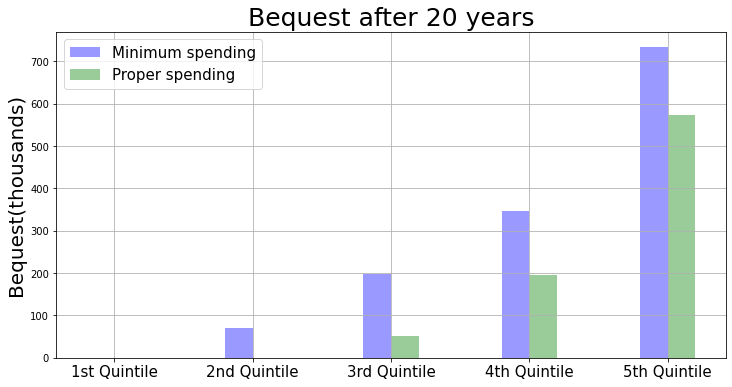

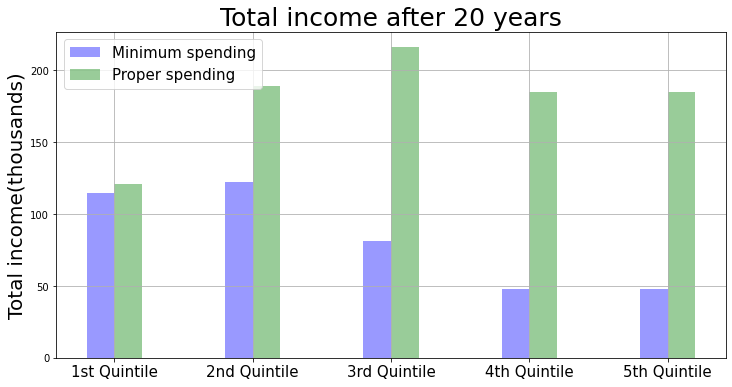

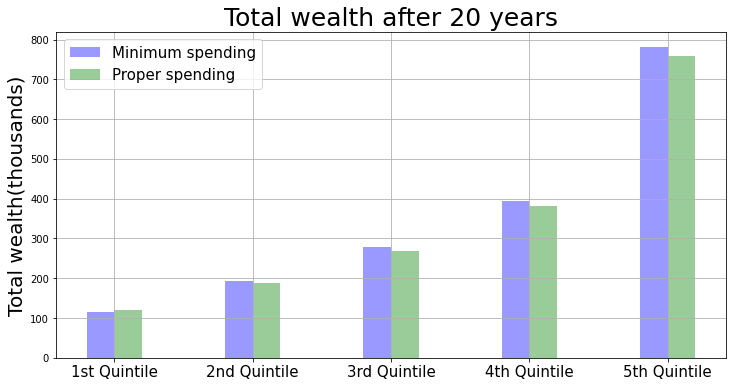

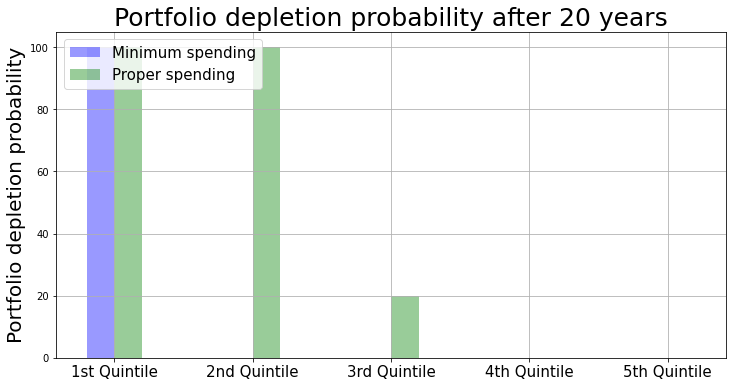

In [26]:
plt.figure(figsize=(12,6))
plt.bar(x-0.1, e_minimum[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Minimum spending')
plt.bar(x+0.1, e_normal[0:5], bar_width, alpha=0.4, color='green', label = 'Proper spending') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Bequest(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Bequest after 20 years', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.1, d_minimum[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Minimum spending')
plt.bar(x+0.1, d_normal[0:5], bar_width, alpha=0.4, color='green', label = 'Proper spending') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total income(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total income after 20 years', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.1, f_minimum[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Minimum spending')
plt.bar(x+0.1, f_normal[0:5], bar_width, alpha=0.4, color='green', label = 'Proper spending') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total wealth(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total wealth after 20 years', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.1, a_minimum[0:5], bar_width, alpha=0.4, color = 'blue', label = 'Minimum spending')
plt.bar(x+0.1, a_normal[0:5], bar_width, alpha=0.4, color='green', label = 'Proper spending') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Portfolio depletion probability', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Portfolio depletion probability after 20 years', fontsize = 25)
plt.grid(visible=True)
plt.show()

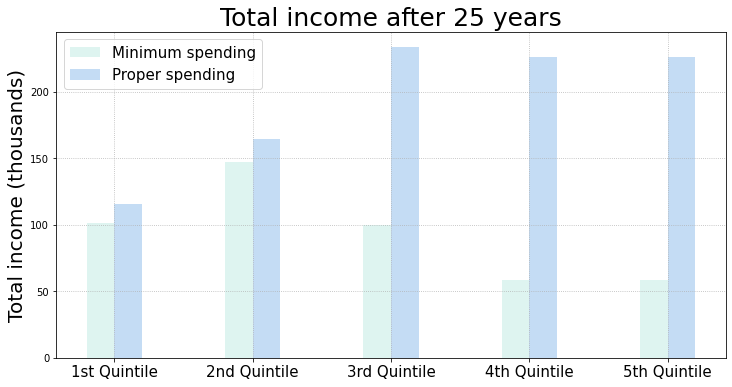

In [27]:
plt.figure(figsize=(12,6))
plt.bar(x-0.1, d_minimum[5:10], bar_width, alpha=0.4, color = '#ADE4DB', label = 'Minimum spending')
plt.bar(x+0.1, d_normal[5:10], bar_width, alpha=0.4, color='#6DA9E4', label = 'Proper spending') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total income (thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total income after 25 years', fontsize = 25)
plt.grid(visible=True, linestyle=":")
plt.show()

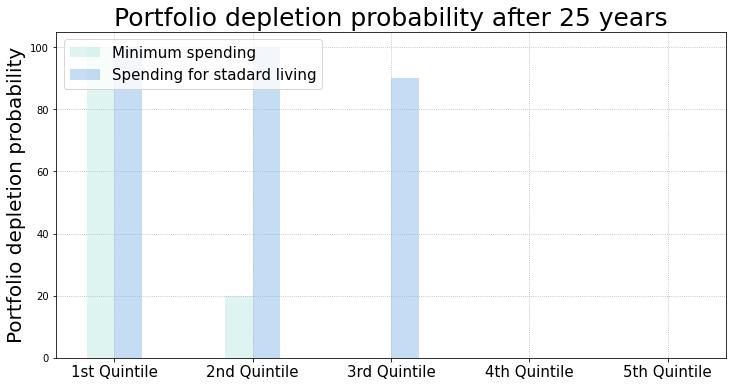

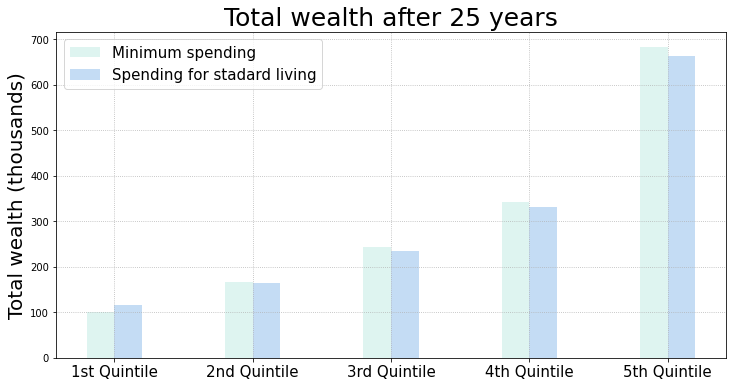

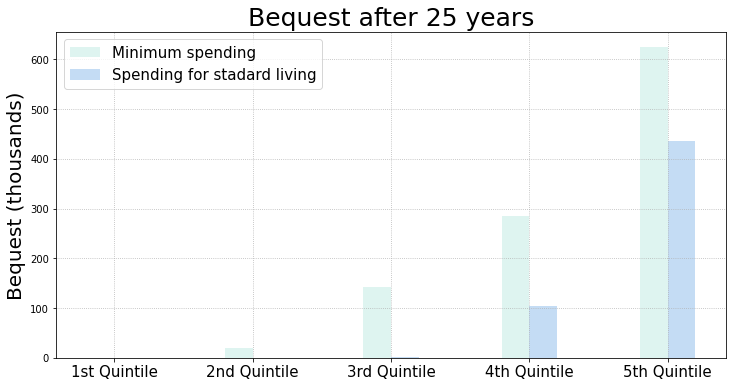

In [28]:
plt.figure(figsize=(12,6))
plt.bar(x-0.1, a_minimum[5:10], bar_width, alpha=0.4, color = '#ADE4DB', label = 'Minimum spending')
plt.bar(x+0.1, a_normal[5:10], bar_width, alpha=0.4, color='#6DA9E4', label = 'Spending for stadard living') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Portfolio depletion probability', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Portfolio depletion probability after 25 years', fontsize = 25)
plt.grid(visible=True, linestyle=":")
plt.show()



plt.figure(figsize=(12,6))
plt.bar(x-0.1, f_minimum[5:10], bar_width, alpha=0.4, color = '#ADE4DB', label = 'Minimum spending')
plt.bar(x+0.1, f_normal[5:10], bar_width, alpha=0.4, color='#6DA9E4', label = 'Spending for stadard living') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total wealth (thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total wealth after 25 years', fontsize = 25)
plt.grid(visible=True, linestyle=":")
plt.show()



plt.figure(figsize=(12,6))
plt.bar(x-0.1, e_minimum[5:10], bar_width, alpha=0.4, color = '#ADE4DB', label = 'Minimum spending')
plt.bar(x+0.1, e_normal[5:10], bar_width, alpha=0.4, color='#6DA9E4', label = 'Spending for stadard living') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Bequest (thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Bequest after 25 years', fontsize = 25)
plt.grid(visible=True, linestyle=":")
plt.show()

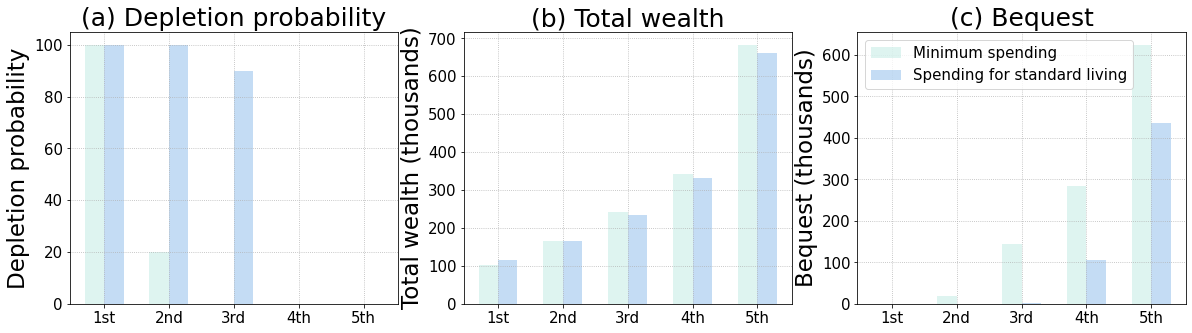

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
labels = ['1st', '2nd', '3rd', '4th', '5th']
bar_width = 0.3

# First subplot
axs[0].bar(x-0.15, a_minimum[5:10], bar_width, alpha=0.4, color = '#ADE4DB', label = 'Minimum spending')
axs[0].bar(x+0.15, a_normal[5:10], bar_width, alpha=0.4, color='#6DA9E4', label = 'Spending for standard living') 
axs[0].set_xticks(x)
axs[0].set_xticklabels(labels, fontsize = 15)
axs[0].set_ylabel('Depletion probability', fontsize = 23)
axs[0].tick_params(axis='y', labelsize=15)  # Enlarging y-axis ticks
axs[0].set_title('(a) Depletion probability', fontsize = 25)
axs[0].grid(visible=True, linestyle=":")

# Second subplot
axs[1].bar(x-0.15, f_minimum[5:10], bar_width, alpha=0.4, color = '#ADE4DB', label = 'Minimum spending')
axs[1].bar(x+0.15, f_normal[5:10], bar_width, alpha=0.4, color='#6DA9E4', label = 'Spending for standard living') 
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, fontsize = 15)
axs[1].set_ylabel('Total wealth (thousands)', fontsize = 23)
axs[1].tick_params(axis='y', labelsize=15)  # Enlarging y-axis ticks
axs[1].set_title('(b) Total wealth', fontsize = 25)
axs[1].grid(visible=True, linestyle=":")

# Third subplot
axs[2].bar(x-0.15, e_minimum[5:10], bar_width, alpha=0.4, color = '#ADE4DB', label = 'Minimum spending')
axs[2].bar(x+0.15, e_normal[5:10], bar_width, alpha=0.4, color='#6DA9E4', label = 'Spending for standard living') 
axs[2].set_xticks(x)
axs[2].set_xticklabels(labels, fontsize = 15)
axs[2].set_ylabel('Bequest (thousands)', fontsize = 23)
axs[2].tick_params(axis='y', labelsize=15)  # Enlarging y-axis ticks
axs[2].legend(loc='upper left', fontsize = '15')
axs[2].set_title('(c) Bequest', fontsize = 25)
axs[2].grid(visible=True, linestyle=":")

plt.savefig('./national_problem_main_25.pdf', format='pdf')
plt.show()


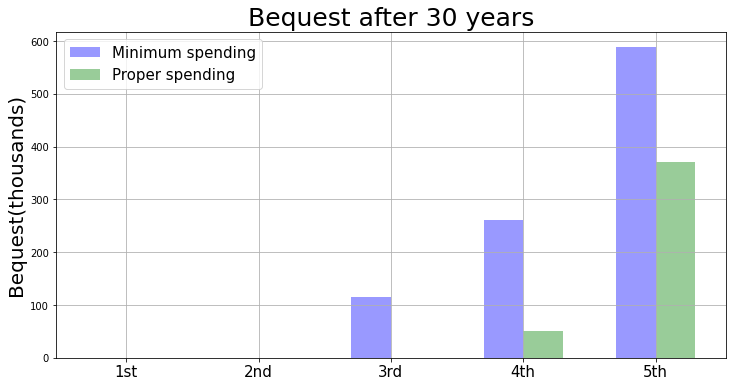

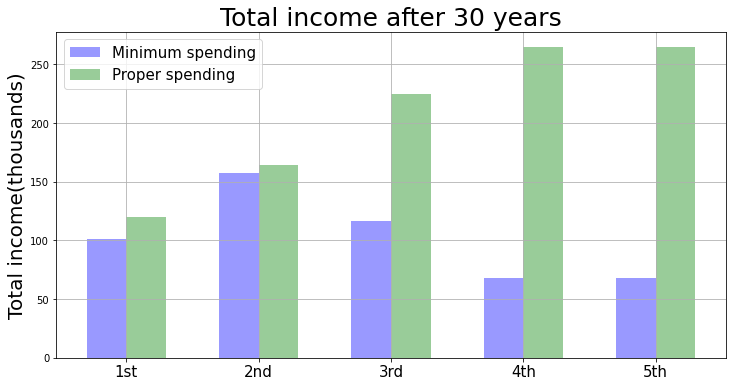

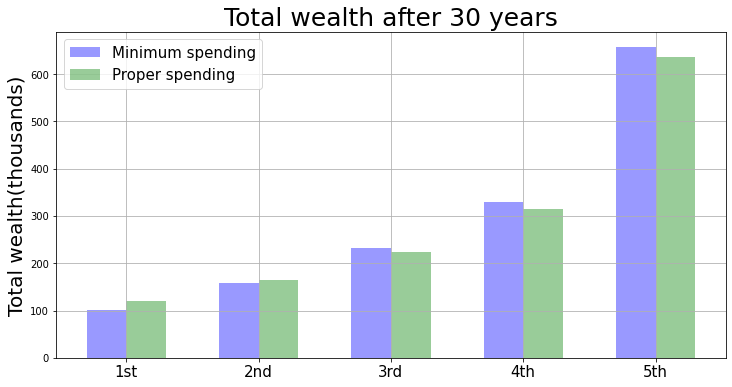

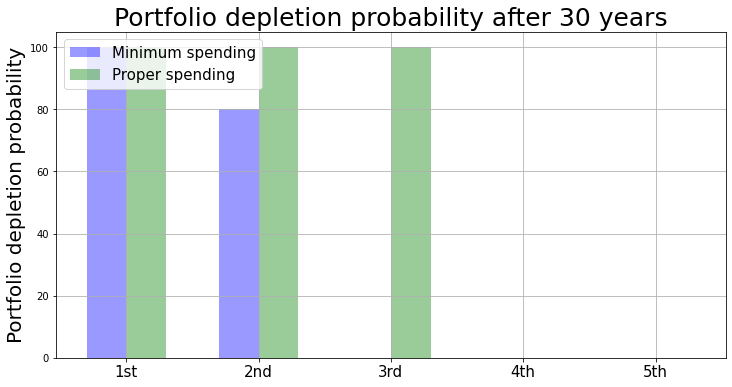

In [30]:
plt.figure(figsize=(12,6))
plt.bar(x-0.15, e_minimum[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Minimum spending')
plt.bar(x+0.15, e_normal[10:15], bar_width, alpha=0.4, color='green', label = 'Proper spending') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Bequest(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Bequest after 30 years', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.15, d_minimum[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Minimum spending')
plt.bar(x+0.15, d_normal[10:15], bar_width, alpha=0.4, color='green', label = 'Proper spending') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total income(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total income after 30 years', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.15, f_minimum[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Minimum spending')
plt.bar(x+0.15, f_normal[10:15], bar_width, alpha=0.4, color='green', label = 'Proper spending') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Total wealth(thousands)', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Total wealth after 30 years', fontsize = 25)
plt.grid(visible=True)
plt.show()

plt.figure(figsize=(12,6))
plt.bar(x-0.15, a_minimum[10:15], bar_width, alpha=0.4, color = 'blue', label = 'Minimum spending')
plt.bar(x+0.15, a_normal[10:15], bar_width, alpha=0.4, color='green', label = 'Proper spending') 
plt.xticks(x, labels, fontsize = 15)
plt.ylabel('Portfolio depletion probability', fontsize = 20)
plt.legend(loc='upper left', fontsize = '15')
plt.title('Portfolio depletion probability after 30 years', fontsize = 25)
plt.grid(visible=True)
plt.show()

In [31]:
# 매트릭 참고

# https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2544651
# https://investmentsandwealth.org/getattachment/90eb6376-d090-4904-9f82-786553ff5ed9/RMJ023-OptimalWithdrawalStrategy.pdf
# https://www.betterfinancialeducation.com/sites/larryfrank.us1.advisor.ws/files/documents/apr09_frank_and_blanchett.pdf
# https://www.tandfonline.com/doi/epdf/10.2469/faj.v61.n6.2776?needAccess=true&role=button